<a href="https://colab.research.google.com/github/saied-ahemd/titanic_Survived/blob/main/titanicKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [2]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [3]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dftest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


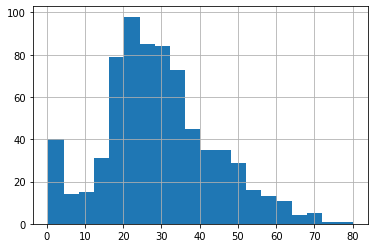

In [5]:
dftrain['Age'].hist(bins=20)
plt.show()

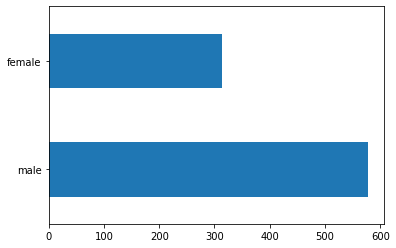

In [6]:
dftrain.Sex.value_counts().plot(kind='barh')
plt.show()

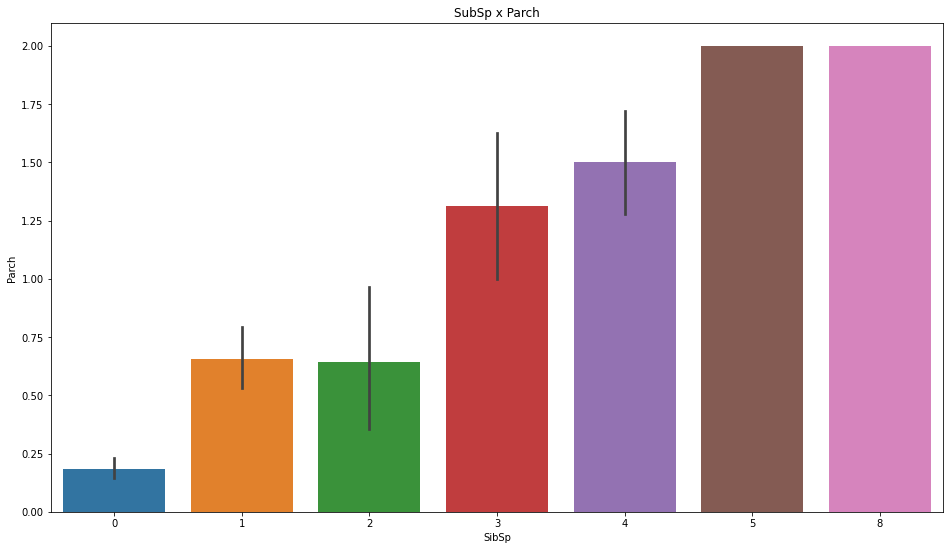

In [7]:
plt.figure(figsize=(16,9))
sns.barplot(x='SibSp', y='Parch', data=dftrain)
plt.title('SubSp x Parch')
plt.show()


In [8]:
# now we will treate the missing vlaue 
print(dftest.isna().sum(),'\n\n')
print(dftrain.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
dftrain.groupby('Embarked').agg(['mean', 'std']).drop('PassengerId', axis=1)

#For train data
dftrain['Embarked'] = dftrain['Embarked'].fillna(value='S')

#For test data
dftest['Embarked'] = dftest['Embarked'].fillna(value='S')

In [10]:
dftrain.groupby('Age').agg(['mean', 'std']).drop('PassengerId', axis=1)
#For train data
dftrain['Age'] = dftrain['Age'].fillna(value=0)

#For test data
dftest['Age'] = dftest['Age'].fillna(value=0)

In [11]:
#For train and test data
dftrain = dftrain.drop('Cabin', axis=1)
dftest = dftest.drop('Cabin', axis=1)

In [12]:
dftrain = dftrain.drop([ 'Name', 'Ticket'], axis=1)
dftest = dftest.drop(['Name', 'Ticket'], axis=1)
dftrain

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,0.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [13]:
dftrain['SexNu'] = dftrain['Sex'].map({'male':1,'female':0})
dftrain = dftrain.drop(['Sex'],axis=1)
dftrain

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,SexNu
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S,1
887,888,1,1,19.0,0,0,30.0000,S,0
888,889,0,3,0.0,1,2,23.4500,S,0
889,890,1,1,26.0,0,0,30.0000,C,1


In [14]:
# now we will do the same thing for the test data
dftest['SexNu'] = dftest['Sex'].map({'male':1,'female':0})
dftest = dftest.drop(['Sex'],axis=1)
dftest

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,SexNu
0,892,3,34.5,0,0,7.8292,Q,1
1,893,3,47.0,1,0,7.0000,S,0
2,894,2,62.0,0,0,9.6875,Q,1
3,895,3,27.0,0,0,8.6625,S,1
4,896,3,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0,0,8.0500,S,1
414,1306,1,39.0,0,0,108.9000,C,0
415,1307,3,38.5,0,0,7.2500,S,1
416,1308,3,0.0,0,0,8.0500,S,1


In [15]:
# now we will map throw the Embarked column and convert it into numirc value
dftrain['Embarked'] = dftrain['Embarked'].map({'C':0,'S':1,'Q':2})

In [16]:
dftest['Embarked'] = dftest['Embarked'].map({'C':0,'S':1,'Q':2})

In [17]:
dftrain['Fare'] = dftrain['Fare'].fillna(value=0)

In [19]:
# now we will get the label and the feature
y = dftrain['Survived']
X = dftrain.drop(['Survived'],axis=1)
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,SexNu
0,1,3,22.0,1,0,7.2500,1,1
1,2,1,38.0,1,0,71.2833,0,0
2,3,3,26.0,0,0,7.9250,1,0
3,4,1,35.0,1,0,53.1000,1,0
4,5,3,35.0,0,0,8.0500,1,1
...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,1
887,888,1,19.0,0,0,30.0000,1,0
888,889,3,0.0,1,2,23.4500,1,0
889,890,1,26.0,0,0,30.0000,0,1


In [21]:
# now let's spilt the data
Xtrain, Xval, ytrain, yval = train_test_split(X,y,test_size=0.25, random_state=1)
print(Xtrain.shape,ytrain.shape)
print(Xval.shape,yval.shape)

(668, 8) (668,)
(223, 8) (223,)


In [22]:
Xtrain['Age'] = Xtrain['Age'].fillna(value=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
#For test data
Xval['Age'] = Xval['Age'].fillna(value=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
# now we will treate the missing vlaue 
print(Xtrain.isna().sum(),'\n\n')
print(Xval.isna().sum())

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
SexNu          0
dtype: int64 


PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
SexNu          0
dtype: int64


In [26]:
# scale the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(Xtrain)
X_test_scaled = sc.transform(Xval)
X_train_scaled

array([[-1.59875009, -1.59326334,  1.00239816, ...,  0.44426438,
         0.17568209,  0.73186897],
       [-1.55548413,  0.81738199, -1.34775391, ..., -0.34951364,
         2.13160939,  0.73186897],
       [ 0.04535624, -1.59326334,  1.39409017, ...,  1.25118215,
        -1.7802452 ,  0.73186897],
       ...,
       [-1.45321914, -0.38794068, -0.17267788, ...,  0.91183226,
         0.17568209,  0.73186897],
       [-0.81209634,  0.81738199, -1.34775391, ..., -0.52240502,
         0.17568209, -1.36636481],
       [-1.59088355,  0.81738199, -0.17267788, ..., -0.51153134,
         0.17568209,  0.73186897]])

In [27]:
# now we will use the Naive Byes algo and LOg and see whitxh is better
clfNaive = GaussianNB()
clfNaive.fit(X_train_scaled,ytrain) 

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
y_pred = clfNaive.predict(X_test_scaled)
print(y_pred)

[1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0
 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0]


In [29]:
# let's see the acc from the naive Byes model
print("Model's accuracy: {:.2f}%".format(accuracy_score(yval, y_pred)*100))
print("Precision: {:.3f}".format(precision_score(yval, y_pred)))
print("Recall: {:.3f}".format(recall_score(yval, y_pred)))
print("F1: {:.3f}".format(f1_score(yval, y_pred)))

Model's accuracy: 76.23%
Precision: 0.744
Recall: 0.674
F1: 0.707


In [30]:
# now we will try it with Log
clfLog = LogisticRegression().fit(X_train_scaled,ytrain)
lpg_pre = clfLog.predict(X_test_scaled)
print(lpg_pre)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 0]


In [31]:
# now let's see the acc from log
print("Model's accuracy: {:.2f}%".format(accuracy_score(yval, lpg_pre)*100))
print("Precision: {:.3f}".format(precision_score(yval, lpg_pre)))
print("Recall: {:.3f}".format(recall_score(yval, lpg_pre)))
print("F1: {:.3f}".format(f1_score(yval, lpg_pre)))

Model's accuracy: 79.37%
Precision: 0.795
Recall: 0.695
F1: 0.742


In [32]:
# now we will use SVM
clfsvc = SVC()
clfsvc.fit(X_train_scaled,ytrain)
clfsvc_pre = clfsvc.predict(X_test_scaled)
print(clfsvc_pre)

[1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 0]


In [33]:
print("Model's accuracy: {:.2f}%".format(accuracy_score(yval, clfsvc_pre)*100))
print("Precision: {:.3f}".format(precision_score(yval, clfsvc_pre)))
print("Recall: {:.3f}".format(recall_score(yval, clfsvc_pre)))
print("F1: {:.3f}".format(f1_score(yval, clfsvc_pre)))

Model's accuracy: 78.03%
Precision: 0.859
Recall: 0.579
F1: 0.692
